In [1]:
import sys
import tensorflow as tf
import numpy as np
from utensor_cgen.api.export import tflm_keras_export

In [2]:
print(sys.version_info)
print(tf.__version__)

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
2.3.0


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
y_train = y_train.astype('float32')
x_test = x_test.astype('float32') / 255.0
y_test = y_test.astype('float32')

In [4]:
label_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

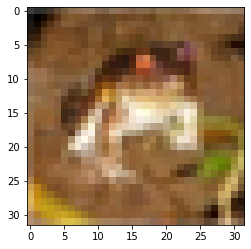

In [7]:
plt.imshow(x_train[0])

In [9]:
simple_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, activation='relu', padding="same"),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

In [10]:
simple_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(0.005),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
)

In [11]:
simple_cnn.build((None,)+ x_train.shape[1:])

In [12]:
simple_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         1

In [13]:
417418 * 4 / 1024 # the model size in kB

1630.5390625

In [14]:
417418 * 4 / 1024 / 3 # the quantized model size in kB (approx.)

543.5130208333334

In [15]:
simple_cnn.fit(
    x_train,
    tf.one_hot(y_train.ravel(), 10).numpy(),
    shuffle=True,
    batch_size=128,
    epochs=10
)

Epoch 1/10
391/391 [==============================] - 83s 212ms/step - loss: 1.9043
Epoch 2/10
391/391 [==============================] - 83s 212ms/step - loss: 1.4742
Epoch 3/10
391/391 [==============================] - 83s 213ms/step - loss: 1.2999
Epoch 4/10
391/391 [==============================] - 83s 213ms/step - loss: 1.1790
Epoch 5/10
391/391 [==============================] - 83s 213ms/step - loss: 1.0825
Epoch 6/10
391/391 [==============================] - 85s 216ms/step - loss: 1.0205
Epoch 7/10
391/391 [==============================] - 90s 231ms/step - loss: 0.9576
Epoch 8/10
391/391 [==============================] - 85s 217ms/step - loss: 0.9294
Epoch 9/10
391/391 [==============================] - 86s 221ms/step - loss: 0.8923
Epoch 10/10
391/391 [==============================] - 85s 217ms/step - loss: 0.8722


In [16]:
logits = simple_cnn(x_test)
y_hat = np.argmax(
    logits.numpy(),
    axis=-1,
)

In [17]:
(y_hat == y_test.ravel()).mean()

0.6622

In [18]:
def representative_dataset():
    for idx in np.random.randint(0, x_train.shape[0], 1024):
        yield [x_train[[idx]]]

In [21]:
tflm_keras_export(
    simple_cnn,
    representative_dataset,
    model_name="simple_cnn",
    output_tflite_fname='simple_cnn.tflite'
)

INFO:tensorflow:Assets written to: /tmp/utensor_mjhjx1cw/saved_model/assets


INFO:tensorflow:Assets written to: /tmp/utensor_mjhjx1cw/saved_model/assets


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/flatten/Const;StatefulPartitionedCall/sequential/flatten/Const, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/dense/MatMul;StatefulPartitionedCall/sequential/dense/MatMul, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/dense_1/MatMul;StatefulPartitionedCall/sequential/dense_1/MatMul, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/conv2d/Conv2D;StatefulPartitionedCall/sequential/conv2d/Conv2D, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/conv2d_1/Conv2D;StatefulPartitionedCall/sequential/conv2d_1/Conv2D, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/conv2d_2/Conv2D;StatefulPartitionedCall/sequential/conv2d_2/Conv2D, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/conv2d_3/Conv2D;StatefulPartitionedCall/sequential/conv2d_3/Conv2D, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/conv2d_4/Conv2D;StatefulPartitionedCall/sequential/conv2d_4/Conv2D, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/conv2d_5/Conv2D;StatefulPartitionedCall/sequential/conv2d_5/Conv2D, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/conv2d/Relu;StatefulPartitionedCall/sequential/conv2d/Relu;sequential/conv2d/BiasAdd;StatefulPartitionedCall/sequential/conv2d/BiasAdd;sequential/conv2d_5/Conv2D;StatefulPartitionedCall/sequential/conv2d_5/Conv2D;sequential/conv2d/Conv2D;StatefulPartitionedCall/sequential/conv2d/Conv2D;unknown_0, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/conv2d_1/Relu;StatefulPartitionedCall/sequential/conv2d_1/Relu;sequential/conv2d_1/BiasAdd;StatefulPartitionedCall/sequential/conv2d_1/BiasAdd;sequential/conv2d_5/Conv2D;StatefulPartitionedCall/sequential/conv2d_5/Conv2D;sequential/conv2d_1/Conv2D;StatefulPartitionedCall/sequential/conv2d_1/Conv2D;unknown_2, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/max_pooling2d/MaxPool;StatefulPartitionedCall/sequential/max_pooling2d/MaxPool, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/conv2d_2/Relu;StatefulPartitionedCall/sequential/conv2d_2/Relu;sequential/conv2d_2/BiasAdd;StatefulPartitionedCall/sequential/conv2d_2/BiasAdd;sequential/conv2d_4/Conv2D;StatefulPartitionedCall/sequential/conv2d_4/Conv2D;sequential/conv2d_2/Conv2D;StatefulPartitionedCall/sequential/conv2d_2/Conv2D;unknown_4, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/conv2d_3/Relu;StatefulPartitionedCall/sequential/conv2d_3/Relu;sequential/conv2d_3/BiasAdd;StatefulPartitionedCall/sequential/conv2d_3/BiasAdd;sequential/conv2d_4/Conv2D;StatefulPartitionedCall/sequential/conv2d_4/Conv2D;sequential/conv2d_3/Conv2D;StatefulPartitionedCall/sequential/conv2d_3/Conv2D;unknown_6, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/max_pooling2d_1/MaxPool;StatefulPartitionedCall/sequential/max_pooling2d_1/MaxPool, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/conv2d_4/Relu;StatefulPartitionedCall/sequential/conv2d_4/Relu;sequential/conv2d_4/BiasAdd;StatefulPartitionedCall/sequential/conv2d_4/BiasAdd;sequential/conv2d_4/Conv2D;StatefulPartitionedCall/sequential/conv2d_4/Conv2D;unknown_8, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/conv2d_5/Relu;StatefulPartitionedCall/sequential/conv2d_5/Relu;sequential/conv2d_5/BiasAdd;StatefulPartitionedCall/sequential/conv2d_5/BiasAdd;sequential/conv2d_5/Conv2D;StatefulPartitionedCall/sequential/conv2d_5/Conv2D;unknown_10, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/max_pooling2d_2/MaxPool;StatefulPartitionedCall/sequential/max_pooling2d_2/MaxPool, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/flatten/Reshape;StatefulPartitionedCall/sequential/flatten/Reshape, will be replaced or pruned


[WARNING tflite.py _build_tensor_map @ 87] Unexpected character founded in tensor name sequential/dense/Relu;StatefulPartitionedCall/sequential/dense/Relu;sequential/dense/BiasAdd;StatefulPartitionedCall/sequential/dense/BiasAdd, will be replaced or pruned


[WARNING base.py __attrs_post_init__ @ 299] cannot convert new_shape to generic value: [](<class 'list'>)


[WARNING tflite.py _hotfix_reshape @ 279] 10_RESHAPE has no new_shape as its attributes, using the second input tensor as new shape instead


[WARNING tflite.py _hotfix_reshape @ 291] implicit convert negative shape of reshape op to positive: [-1, 1024] -> [1, 1024]


[INFO transformer.py transform @ 23] Transforming graph: simple_cnn


INFO:utensor-cli:Transforming graph: simple_cnn


[INFO transformer.py transform @ 24] Transform pipeline: dropout(name_pattern=r'(dropout[_\w\d]*)/.*') -> linear_reorder -> inline -> biasAdd -> remove_id_op -> fake_gather_v2 -> refcnt


INFO:utensor-cli:Transform pipeline: dropout(name_pattern=r'(dropout[_\w\d]*)/.*') -> linear_reorder -> inline -> biasAdd -> remove_id_op -> fake_gather_v2 -> refcnt


[WARNING base.py __attrs_post_init__ @ 299] cannot convert new_shape to generic value: [1, 1024](<class 'list'>)


[WARNING base.py __attrs_post_init__ @ 299] cannot convert new_shape to generic value: [1, 1024](<class 'list'>)


[WARNING base.py __attrs_post_init__ @ 299] cannot convert new_shape to generic value: [1, 1024](<class 'list'>)


[WARNING base.py __attrs_post_init__ @ 299] cannot convert new_shape to generic value: [1, 1024](<class 'list'>)


[WARNING ns_transformer.py transform @ 243] enabling fake_gather_v2 will force replacing GatherV2 with Gather


[WARNING base.py __attrs_post_init__ @ 299] cannot convert new_shape to generic value: [1, 1024](<class 'list'>)


[WARNING base.py __attrs_post_init__ @ 299] cannot convert new_shape to generic value: [1, 1024](<class 'list'>)


[INFO transformer.py transform @ 31] Graph transormation done


INFO:utensor-cli:Graph transormation done


[INFO generic_graph_lower.py apply @ 56] topo ordered tensor life span analysis done


INFO:utensor-cli:topo ordered tensor life span analysis done


[INFO utils.py wrapped @ 469] collapsed time of calling apply: 0.0012 seconds


INFO:utensor-cli:collapsed time of calling apply: 0.0012 seconds


[INFO generic_graph_lower.py _solve_space_alloc @ 204] optimal tensor allocation plan solved, total memory required: 131072 bytes


INFO:utensor-cli:optimal tensor allocation plan solved, total memory required: 131072 bytes


[INFO generic_graph_lower.py _solve_space_alloc @ 205] number of tensors allocated: 20


INFO:utensor-cli:number of tensors allocated: 20


[INFO utils.py wrapped @ 469] collapsed time of calling _solve_space_alloc: 0.0061 seconds


INFO:utensor-cli:collapsed time of calling _solve_space_alloc: 0.0061 seconds


[INFO _code_generator.py _time_slot_generate_files @ 245] model parameters header file generated: constants/simple_cnn/params_simple_cnn.hpp


INFO:utensor-cli:model parameters header file generated: constants/simple_cnn/params_simple_cnn.hpp


[INFO _code_generator.py _time_slot_generate_files @ 266] model header file generated: models/simple_cnn/simple_cnn.hpp


INFO:utensor-cli:model header file generated: models/simple_cnn/simple_cnn.hpp


[INFO _code_generator.py _time_slot_generate_files @ 286] model cpp file generated: models/simple_cnn/simple_cnn.cpp


INFO:utensor-cli:model cpp file generated: models/simple_cnn/simple_cnn.cpp
